In [290]:
# Emre Yuce

# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time.

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses:
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One)
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following:
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One)
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three)
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One)
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **grouping data** (Manipulating DataFrames with pandas, Module Four)
    - **melting data** (Manipulating DataFrames with pandas, Module Three)
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four)
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One)
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two)
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four)

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting.

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading
2. Cleaning, transforming, and visualizing
3. Modeling
4. Evaluating and concluding


### 1. Sourcing and Loading

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries.

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One.

#### 1.1. Importing Libraries

In [291]:
# Let's import the pandas, numpy libraries as pd, and np respectively.
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets.

In [292]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file.
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy:

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer.



***Hint:*** This part of the data science pipeline should test those skills you acquired in:
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules.
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

In [293]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


**2.1. Exploring your data**

Think about your pandas functions for checking out a dataframe.

In [294]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            351 non-null    datetime64[ns]
 1   City of London        352 non-null    object        
 2   Barking & Dagenham    352 non-null    object        
 3   Barnet                352 non-null    object        
 4   Bexley                352 non-null    object        
 5   Brent                 352 non-null    object        
 6   Bromley               352 non-null    object        
 7   Camden                352 non-null    object        
 8   Croydon               352 non-null    object        
 9   Ealing                352 non-null    object        
 10  Enfield               352 non-null    object        
 11  Greenwich             352 non-null    object        
 12  Hackney               352 non-null    object        
 13  Hammersmith & Fulham

In [295]:
print(properties.index)
properties.columns


RangeIndex(start=0, stop=352, step=1)


Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

## After exploring the data first couple things to do:
* Drop columns 'Unnamed: #' with 0 values
* Transpose dataframe
* first change date format to year-month and make dates column names

                                                            Emre Yuce

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [296]:
properties = properties.rename(columns={'Unnamed: 0':'Date'})

properties.drop(['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'],  axis=1, inplace=True)




properties.isna().sum().sum() # 0 -> no missing vaulues |  we got one from Date row which we will take care later

1

In [297]:
properties = properties.T
properties.head()

,0,1,2,3,4,5,6,7,8,9,...,342,343,344,345,346,347,348,349,350,351
Date,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,960267,967351,918300,879340,862513,818725,765053,745920,753200,676544
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,341062,339005,339326,337259,337522,341472,339780,326328,317476,315275
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,581623,583571,588157,587550,579748,580851,577726,576544,575585,591449
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,395789,397776,397210,398389,393944,398303,394620,394830,395463,403037


In [298]:
properties.reset_index(inplace=True)
properties.set_index(0, inplace=True)
properties.head()

,index,1,2,3,4,5,6,7,8,9,...,342,343,344,345,346,347,348,349,350,351
0,,,,,,,,,,,,,,,,,,,,,
NaT,Date,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00
E09000001,City of London,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,960267,967351,918300,879340,862513,818725,765053,745920,753200,676544
E09000002,Barking & Dagenham,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,341062,339005,339326,337259,337522,341472,339780,326328,317476,315275
E09000003,Barnet,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,581623,583571,588157,587550,579748,580851,577726,576544,575585,591449
E09000004,Bexley,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,395789,397776,397210,398389,393944,398303,394620,394830,395463,403037


In [299]:
properties.loc['NaT', 'index'] = np.NaN
properties = properties.copy()

In [300]:
properties.drop('NaT',axis=0, inplace=True)

In [301]:

properties.head()

,index,1,2,3,4,5,6,7,8,9,...,342,343,344,345,346,347,348,349,350,351
0,,,,,,,,,,,,,,,,,,,,,
NaT,Date,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00
E09000001,City of London,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,960267,967351,918300,879340,862513,818725,765053,745920,753200,676544
E09000002,Barking & Dagenham,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,341062,339005,339326,337259,337522,341472,339780,326328,317476,315275
E09000003,Barnet,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,581623,583571,588157,587550,579748,580851,577726,576544,575585,591449
E09000004,Bexley,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,395789,397776,397210,398389,393944,398303,394620,394830,395463,403037


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [302]:
properties.columns = properties.iloc[0]

properties.rename(columns={'Date':'Borough'}, inplace=True)
#properties.drop(pd.NaT, inplace=True)

properties.columns.name= None
properties.index.name= 'Code'
properties = properties.loc['E09000002':'E09000033']
properties.reset_index(inplace=True)

In [303]:
properties.head()

,Code,Borough,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00
0,E09000002,Barking & Dagenham,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,341062,339005,339326,337259,337522,341472,339780,326328,317476,315275
1,E09000003,Barnet,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,581623,583571,588157,587550,579748,580851,577726,576544,575585,591449
2,E09000004,Bexley,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,395789,397776,397210,398389,393944,398303,394620,394830,395463,403037
3,E09000005,Brent,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,516817,511865,528739,528787,528411,514028,510416,527380,530682,512292
4,E09000006,Bromley,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,498973,498889,500597,500052,498690,493197,495341,501277,499836,494801


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data?

You might need to **melt** your DataFrame here.

In [304]:
properties_tall = properties.melt(id_vars=['Code','Borough'], var_name='Date', value_name='House_Price')


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers...

In [305]:
properties_tall['House_Price'] = properties_tall['House_Price'].astype(float)
properties_tall['Date'] = pd.to_datetime(properties_tall['Date'])
properties_tall.info()
properties_tall.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Code         11232 non-null  object        
 1   Borough      11232 non-null  object        
 2   Date         11232 non-null  datetime64[ns]
 3   House_Price  11232 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 351.1+ KB


,Code,Borough,Date,House_Price
0,E09000002,Barking & Dagenham,1995-01-01,50460.22660
1,E09000003,Barnet,1995-01-01,93284.51832
2,E09000004,Bexley,1995-01-01,64958.09036
3,E09000005,Brent,1995-01-01,71306.56698
4,E09000006,Bromley,1995-01-01,81671.47692


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column?

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit.

In [306]:
# That has been taken care earlier
properties.shape


(32, 353)

In [307]:
properties_tall.isna().sum() # we have no null/NaN values

Code           0
Borough        0
Date           0
House_Price    0
dtype: int64

In [308]:
properties_tall['Year'] = properties_tall.Date.dt.year
properties_tall['Month'] = properties_tall.Date.dt.month
properties_tall.drop(columns='Date', inplace=True)

In [309]:
properties_tall.head()


,Code,Borough,House_Price,Year,Month
0,E09000002,Barking & Dagenham,50460.22660,1995,1
1,E09000003,Barnet,93284.51832,1995,1
2,E09000004,Bexley,64958.09036,1995,1
3,E09000005,Brent,71306.56698,1995,1
4,E09000006,Bromley,81671.47692,1995,1


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

Year
1995     91792.537433
1996     94000.445448
1997    106883.185546
1998    122359.468033
1999    136004.512067
Name: House_Price, dtype: float64


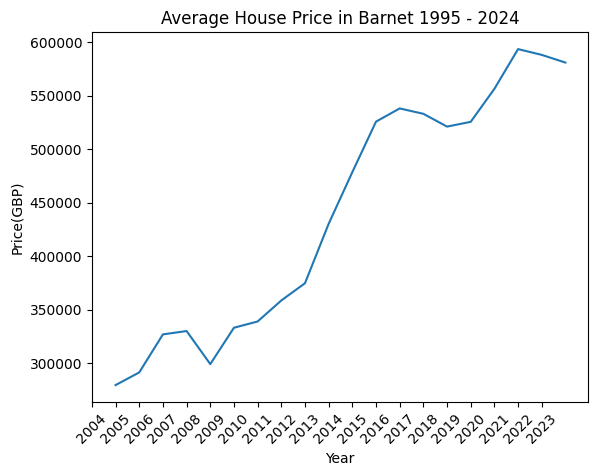

In [310]:
# I did prefer to visualize price change over the years
borough = 'Barnet'
last_years = 20

avg_prices_by_year=properties_tall[properties_tall['Borough']== borough].groupby('Year')['House_Price'].mean()
print(avg_prices_by_year.head())
avg_prices_by_year = avg_prices_by_year[-last_years:]
avg_prices_by_year.plot(kind='line', rot=45)
plt.title(f'Average House Price in {borough} 1995 - 2024')
plt.ylabel('Price(GBP)')

plt.xticks([i for i in range(int(avg_prices_by_year.index[-1])-last_years,int(avg_prices_by_year.index[-1]))])
plt.show()

In [311]:
properties_tall = properties_tall[properties_tall['Year']>=2004]

In [312]:
properties_tall.head()

,Code,Borough,House_Price,Year,Month
3456,E09000002,Barking & Dagenham,150115.1187,2004,1
3457,E09000003,Barnet,259868.2674,2004,1
3458,E09000004,Bexley,169114.8067,2004,1
3459,E09000005,Brent,223970.7457,2004,1
3460,E09000006,Bromley,224284.4328,2004,1


To limit the number of data points you have, you might want to extract the year from every month value your *Month* column.

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column
3. store that corresponding year as separate column.

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades?

In [313]:

#properties_tall = properties_tall.groupby(['Borough','Year'])['House_Price'].mean()
properties_ptable = properties_tall.pivot_table(index='Borough', columns='Year', values='House_Price')
properties_ptable.head()


Year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Borough,,,,,,,,,,,,,,,,,,,,,
Barking & Dagenham,158175.982483,163360.782017,167853.342558,184909.807383,187356.865783,156446.896358,166560.705275,163465.144225,165863.911600,173733.624933,...,233460.107425,273919.636042,287734.717358,295196.673612,298207.102333,300836.133975,309894.416667,336574.916667,341035.333333,319693.000000
Barnet,271854.112992,279459.669683,291337.796208,326915.498517,330023.313392,299103.014817,333128.096700,338978.012525,358627.346250,374770.610075,...,478687.949875,525939.577300,538281.017008,533266.534055,521293.325225,525757.268125,556596.083333,593797.333333,588396.833333,581192.666667
Bexley,179141.168258,186512.186267,191831.056892,208085.873442,210199.183692,189050.806042,200874.151217,200672.256583,202546.430625,213470.261625,...,274209.280967,321563.508775,335694.468958,342603.605654,336872.501558,343326.448458,368176.500000,399580.250000,401447.000000,397776.666667
Brent,236023.435958,241690.070950,253253.437858,286995.347067,292757.915917,264402.049200,289562.700642,298964.549867,314112.757642,339655.613158,...,440951.665383,489469.418367,487703.754375,492845.371252,474597.716283,487681.147733,494764.500000,528224.333333,518067.250000,523451.333333
Bromley,234462.682883,239786.290050,249691.692550,277229.950892,277727.521192,249909.335050,271049.053558,274874.578075,282025.008583,296669.204058,...,385681.450108,428008.119983,441218.585283,443409.985635,436228.656283,435047.904442,467299.333333,502699.750000,500776.166667,498638.000000


In [314]:
properties_ptable['2024-2004'] = properties_ptable[2024] - properties_ptable[2004]
# The Borogh will appear ('Kensington & Chelsea') is the one average price increased the most in last 20 years
properties_ptable.sort_values('2024-2004', ascending=False)


Year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2024-2004
Borough,,,,,,,,,,,,,,,,,,,,,
Kensington & Chelsea,512186.669083,520206.220892,598007.524517,746679.164633,784834.655925,705187.532033,837314.950858,908565.090933,1.009045e+06,1.126573e+06,...,1.276235e+06,1.344540e+06,1.363880e+06,1.235957e+06,1.320568e+06,1.342472e+06,1.448312e+06,1.353778e+06,1.201067e+06,688880.664250
Westminster,379395.350458,399384.994283,436864.876283,514426.682633,540196.640375,532096.975275,606698.240217,632513.602858,6.969260e+05,7.899725e+05,...,9.955434e+05,1.064772e+06,1.020025e+06,9.528957e+05,9.617118e+05,1.025339e+06,1.090405e+06,1.097370e+06,9.484373e+05,569041.982875
Richmond upon Thames,316540.906067,323618.988550,348496.760650,410382.623250,409389.023100,369390.075467,420083.659775,434537.173125,4.549418e+05,4.921157e+05,...,6.537608e+05,6.652847e+05,6.526654e+05,6.486475e+05,6.811753e+05,6.982100e+05,7.467693e+05,7.477404e+05,7.362693e+05,419728.427267
Camden,351847.799300,368345.084125,394819.367875,466485.642400,501223.236400,454628.074967,513221.129450,554392.962617,5.861659e+05,6.674476e+05,...,8.071190e+05,8.393475e+05,8.424104e+05,8.481576e+05,8.335700e+05,8.350992e+05,8.608375e+05,8.550102e+05,7.596453e+05,407797.534033
Hammersmith & Fulham,343380.916750,362575.608525,397586.455625,474140.604467,474947.761650,435456.444217,502256.960300,518573.673433,5.670818e+05,6.315292e+05,...,7.550974e+05,7.569004e+05,7.255253e+05,7.177947e+05,7.269796e+05,7.658351e+05,7.761120e+05,8.387652e+05,7.339857e+05,390604.749917
Islington,285947.162592,295082.026217,319644.788458,385665.577817,386792.368658,345284.435133,398055.199550,424103.790750,4.420902e+05,4.957662e+05,...,6.421372e+05,6.501146e+05,6.498241e+05,6.334857e+05,6.612127e+05,6.837941e+05,6.997917e+05,6.893971e+05,6.633420e+05,377394.837408
Hackney,217677.077825,227936.951650,253254.400458,290396.712150,311770.527550,282240.752267,300490.890992,308698.435383,3.254925e+05,3.726689e+05,...,5.377463e+05,5.490056e+05,5.446405e+05,5.549093e+05,5.828934e+05,5.740938e+05,5.923662e+05,5.947980e+05,5.871477e+05,369470.588842
Wandsworth,271649.723533,284182.075767,310943.885592,372077.557308,363817.597450,340372.939092,374487.981725,386200.188017,4.093921e+05,4.574041e+05,...,6.087409e+05,6.179215e+05,5.966491e+05,5.879152e+05,6.101484e+05,5.936216e+05,6.301597e+05,6.190081e+05,6.115017e+05,339851.943133
Haringey,236265.141883,245820.655150,263920.937508,305509.510292,303396.083083,276214.055258,314479.843742,326468.341325,3.396859e+05,3.722336e+05,...,5.276766e+05,5.573069e+05,5.515606e+05,5.461740e+05,5.572476e+05,5.523339e+05,5.752481e+05,5.794153e+05,5.629510e+05,326685.858117


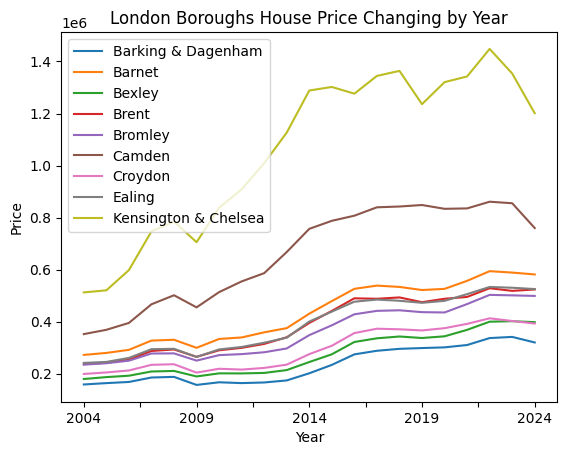

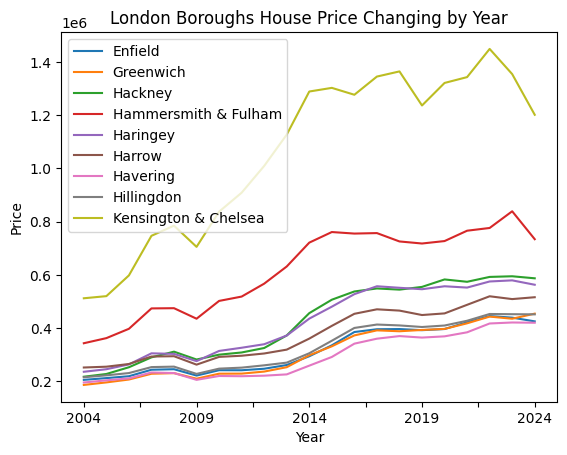

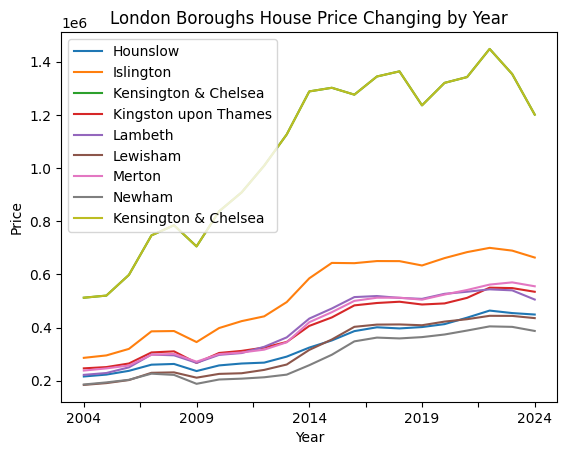

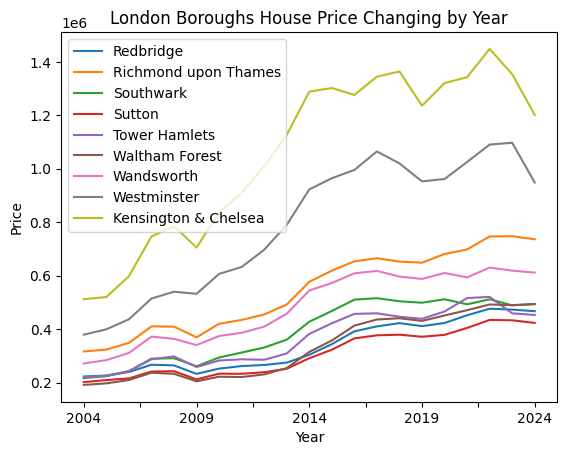

In [315]:
# lets visualize to support that hypothesis

properties_ptable.drop(columns='2024-2004', inplace=True)
def visualize_one_to_others(one='Kensington & Chelsea', others=properties_ptable):
  i = 0
  for index, row in others.iterrows():
    i+=1
    row.plot(label=row.name)

    if not i%8:
      others.loc[one].plot(label=one)
      plt.legend()
      plt.ylabel('Price')
      plt.title('London Boroughs House Price Changing by Year')
      plt.show()
visualize_one_to_others()

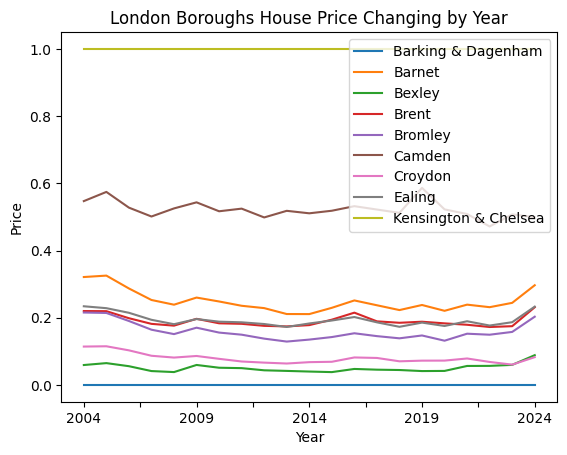

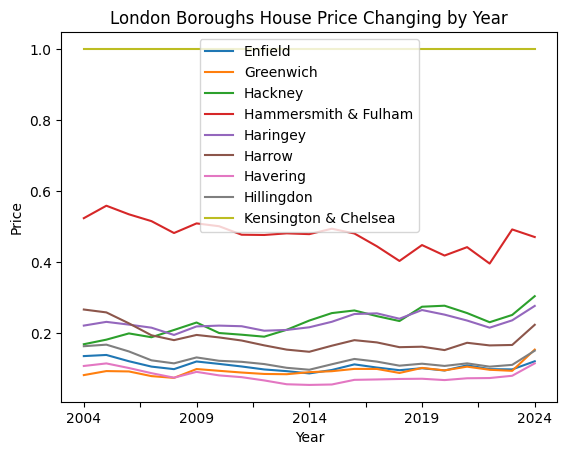

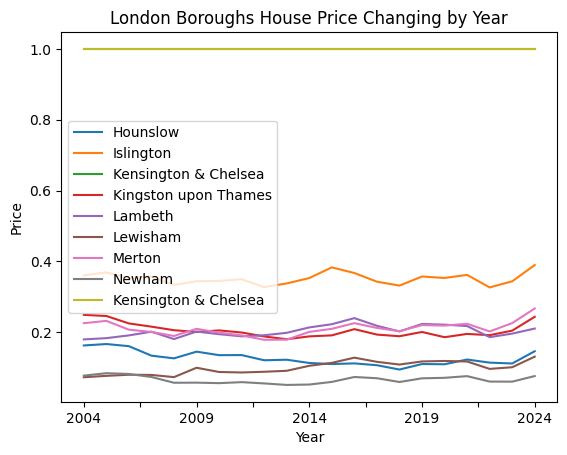

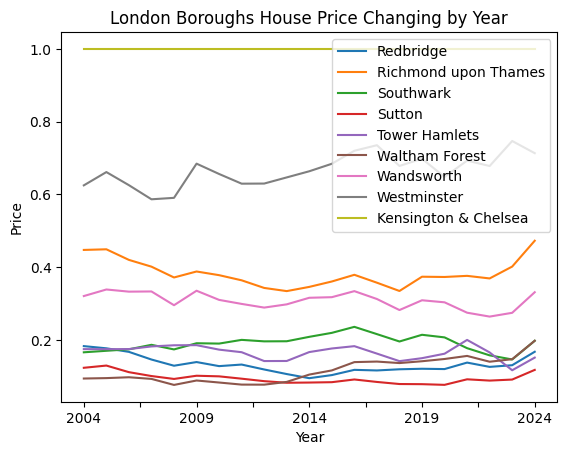

In [316]:
# as we can see from the plots in every group Kensington & Chelsea shows the biggset jump in 20 years
# For this case it is clear but to make sure we can normalize the data for better comparession
normalized_table = properties_ptable.apply(lambda x: (x-x.min())/(x.max()-x.min())) # normalized with min-max method
visualize_one_to_others(others=normalized_table)

In [317]:
# normalized version of it also proves that the biggest movement on 'Kensington & Chelsea'

In [318]:
# First lets bring properties table into good shape before createing function
new_columns = pd.Series([str(a)[:7] if i>0 else str(a) for i, a in enumerate(properties.columns.to_list())])
properties.columns = new_columns
properties.columns = pd.to_datetime(properties.columns, errors='ignore', format='%Y-%m')
#

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great!

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [319]:
def create_price_ratio(df, borough, year_start='1998', year_end='2018'):
  mean_a = df.set_index('Borough').loc[borough, year_start+'-01':year_start+'-12'].mean(axis=0)
  mean_b = df.set_index('Borough').loc[borough, year_end+'-01':year_end+'-12'].mean(axis=0)
  return(mean_a/mean_b)


In [320]:
for i in range(properties.shape[0]):
  print(f"Ratio of average house prices in 1998 to 2018 in {properties['Borough'][i]} : {create_price_ratio(properties, properties['Borough'][i]):.3f}")

Ratio of average house prices in 1998 to 2018 in Barking & Dagenham : 0.204
Ratio of average house prices in 1998 to 2018 in Barnet : 0.229
Ratio of average house prices in 1998 to 2018 in Bexley : 0.235
Ratio of average house prices in 1998 to 2018 in Brent : 0.204
Ratio of average house prices in 1998 to 2018 in Bromley : 0.244
Ratio of average house prices in 1998 to 2018 in Camden : 0.203
Ratio of average house prices in 1998 to 2018 in Croydon : 0.238
Ratio of average house prices in 1998 to 2018 in Ealing : 0.232
Ratio of average house prices in 1998 to 2018 in Enfield : 0.235
Ratio of average house prices in 1998 to 2018 in Greenwich : 0.210
Ratio of average house prices in 1998 to 2018 in Hackney : 0.161
Ratio of average house prices in 1998 to 2018 in Hammersmith & Fulham : 0.242
Ratio of average house prices in 1998 to 2018 in Haringey : 0.195
Ratio of average house prices in 1998 to 2018 in Harrow : 0.246
Ratio of average house prices in 1998 to 2018 in Havering : 0.231
Rati

In [321]:
# Let's analyze the data from 1994 to 2023 to see which borough has actually increased the most in terms of ratio.

ratio_list = []
for i in range(properties.shape[0]):
  ratio_list.append((properties['Borough'][i],create_price_ratio(properties, properties['Borough'][i], year_start='2004', year_end='2023')))
ratio_list.sort(key=(lambda x: x[1]))
for borough in ratio_list:
  print(f"{borough[0]: <25} {borough[1]:.2f}")

Westminster               0.35
Hackney                   0.37
Kensington & Chelsea      0.38
Waltham Forest            0.39
Haringey                  0.41
Hammersmith & Fulham      0.41
Lambeth                   0.41
Camden                    0.41
Islington                 0.41
Lewisham                  0.41
Merton                    0.42
Richmond upon Thames      0.42
Greenwich                 0.43
Wandsworth                0.44
Southwark                 0.44
Bexley                    0.45
Kingston upon Thames      0.45
Ealing                    0.45
Brent                     0.46
Newham                    0.46
Barnet                    0.46
Barking & Dagenham        0.46
Havering                  0.47
Sutton                    0.47
Bromley                   0.47
Enfield                   0.47
Redbridge                 0.47
Hounslow                  0.47
Hillingdon                0.48
Tower Hamlets             0.48
Croydon                   0.49
Harrow                    0.50


# 4. Conclusion
What can you conclude? Type out your conclusion below.

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting.

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course!

# **Conclusion**

Data shows that house prices have been increasing over the last 20 years in every borough of London at a similar rate. However, there are specific years when house prices declined across all boroughs. These years are notably linked to significant economic and political events:

* 2009 - Financial Crisis
* 2019 - Brexit
* 2022 to 2024 - COVID-19 related factors and Brexit (I'am guessing)

This indicates that property has generally been a good investment in London over the past 20 years. However, recent data shows a decline in the last couple of years. This current dip might present a good investment opportunity, as the long-term trend has been positive, and there is potential for prices to rise again.

While Kensington & Chelsea is often considered best boroughs to invest in property when we check compare average prices with 20 years ago, but investing the same amount of money in Westminster can actually yield higher returns.   
